<h1>Problem Statement

<pr>The problem is to develop a regression analysis model to predict the PM2.5 Air Quality Index (AQI) based on various meteorological factors. The dataset includes variables such as average temperature, maximum temperature, minimum temperature, atmospheric pressure at sea level, average relative humidity, average visibility, average wind speed, and maximum sustained wind speed. The goal is to understand the relationship between these meteorological factors and PM2.5 AQI and build a predictive model that can accurately estimate the AQI levels based on the given meteorological data.</pr>

<h1>Introduction

<pr>The data analyst project for portfolio aims to explore and analyze the relationship between various meteorological factors and air quality using regression analysis. The dataset includes several variables related to weather conditions and air pollution levels. The variables include Average Temperature (°C), Maximum temperature (°C), Minimum temperature (°C), Atmospheric pressure at sea level (hPa), Average relative humidity (%), Average visibility (Km), Average wind speed (Km/h), Maximum sustained wind speed (Km/h), and PM2.5 Air Quality Index (AQI) data.</pr>

<pr>Regression analysis is a statistical technique used to identify and quantify the relationship between a dependent variable (in this case, PM2.5 AQI) and one or more independent variables (meteorological factors). By applying regression analysis to this dataset, we aim to understand how meteorological factors influence air quality and to develop a regression model that can predict PM2.5 AQI based on the given meteorological variables.</pr>

<b>Dataset collected from Kaggle:<br>
<b>Source URL: https://www.kaggle.com/datasets/digantdixit/delhi-air-quality-index-data

<h2>Importing required libraries and modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

<h1>Importing Data

In [2]:
AQI_data = pd.read_csv('C:\Mayur Dusane\Data science study\Sample Datasets for projects\Delhi AQI Data.csv')

In [3]:
AQI_data.head()

,Unnamed: 0,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


<h1>Description of Columns

<pr>
    <b>T</b> - Average Temperature (°C): The average temperature recorded during a specific time period.<br>
    <b>TM</b> - Maximum Temperature (°C): The highest temperature recorded during a specific time period.<br>
    <b>Tm</b> - Minimum Temperature (°C): The lowest temperature recorded during a specific time period.<br>
    <b>SLP</b> - Atmospheric Pressure at Sea Level (hPa): The atmospheric pressure measured at sea level.<br>
    <b>H</b> - Average Relative Humidity (%): The average relative humidity recorded during a specific time period.<br>
    <b>VV</b> - Average Visibility (Km): The average visibility recorded during a specific time period.<br>
    <b>V</b> - Average Wind Speed (Km/h): The average wind speed observed during a specific time period.<br>
    <b>VM</b> - Maximum Sustained Wind Speed (Km/h): The maximum sustained wind speed recorded during a specific time period.<br>
    <b>PM2.5</b> - PM2.5 AQI Data: The concentration of PM2.5 particles in the air, represented by the Air Quality Index (AQI).</pr>

<h1>Data Pre-processing
    <h2>Dropping unwanted columns

In [4]:
AQI_data.drop(['Unnamed: 0'],inplace=True,axis=1)

In [5]:
AQI_data.shape

(1093, 9)

<h3>In dataset, We have 1093 rows and 9 columns.

In [6]:
AQI_data.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


<h2>Renaming Column Names

In [7]:
AQI_data.rename(columns={'T':'Avg Temp','TM':'Max Temp','Tm':'Min Temp','SLP':'Pressure',
                         'H':'Avg Hum','VV':'Avg Vis','V':'Avg Wind','VM':'Max Wind'},inplace=True)

In [8]:
#Rounding off 'PM 2.5' column to 1 decimal.
AQI_data['PM 2.5'] = AQI_data['PM 2.5'].round(decimals=1)

In [9]:
AQI_data.head()

,Avg Temp,Max Temp,Min Temp,Pressure,Avg Hum,Avg Vis,Avg Wind,Max Wind,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.7
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.2
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.0
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.2
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.6



<h2>Checking Null Values in Dataset

In [11]:
AQI_data.isnull().any()

Avg Temp    False
Max Temp    False
Min Temp    False
Pressure    False
Avg Hum     False
Avg Vis     False
Avg Wind    False
Max Wind    False
PM 2.5       True
dtype: bool

<b>We could see null values in PM 2.5 column

In [12]:
#Dropped rows with null values.
AQI_data.dropna(axis=0,inplace=True)

In [13]:
AQI_data.isnull().any()

Avg Temp    False
Max Temp    False
Min Temp    False
Pressure    False
Avg Hum     False
Avg Vis     False
Avg Wind    False
Max Wind    False
PM 2.5      False
dtype: bool

<h2>Column Datatype

In [14]:
#Checking column data types.
AQI_data.dtypes

Avg Temp    float64
Max Temp    float64
Min Temp    float64
Pressure    float64
Avg Hum     float64
Avg Vis     float64
Avg Wind    float64
Max Wind    float64
PM 2.5      float64
dtype: object

<h1>Correlation in Dataset

In [15]:
AQI_data.corr().round(decimals=2)

,Avg Temp,Max Temp,Min Temp,Pressure,Avg Hum,Avg Vis,Avg Wind,Max Wind,PM 2.5
Avg Temp,1.00,0.97,0.95,-0.88,-0.51,0.64,0.30,0.29,-0.63
Max Temp,0.97,1.00,0.89,-0.82,-0.59,0.61,0.29,0.30,-0.57
Min Temp,0.95,0.89,1.00,-0.92,-0.29,0.58,0.30,0.27,-0.67
Pressure,-0.88,-0.82,-0.92,1.00,0.24,-0.52,-0.33,-0.31,0.62
Avg Hum,-0.51,-0.59,-0.29,0.24,1.00,-0.47,-0.38,-0.36,0.14
Avg Vis,0.64,0.61,0.58,-0.52,-0.47,1.00,0.38,0.34,-0.57
Avg Wind,0.30,0.29,0.30,-0.33,-0.38,0.38,1.00,0.78,-0.27
Max Wind,0.29,0.30,0.27,-0.31,-0.36,0.34,0.78,1.00,-0.22
PM 2.5,-0.63,-0.57,-0.67,0.62,0.14,-0.57,-0.27,-0.22,1.00


<h2>Correlation Values with Heatmap

<AxesSubplot:>

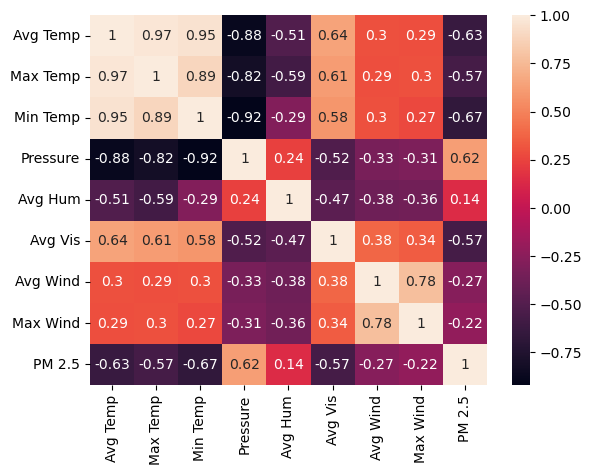

In [17]:
sns.heatmap(AQI_data.corr().round(decimals=2),annot=True)

<h3>We can see that Temperature, Pressure, Visibility are correlated with PM 2.5 AQI.

<h1>Regression Analysis

<h1>Linear Regression Analysis

<h2>Simple Linear Regression between Pressure and PM 2.5 AQI.</h2>

Pressure - Predictor variable/Independent Variable<br>
PM 2.5 - Target Variable/Dependent Variable

In [19]:
x=AQI_data[['Pressure']]
y=AQI_data['PM 2.5']

<h2>Splitting The Dataset into Training and Test Set.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

<h2>Fitting Simple Linear Regression Model to The Training Dataset.

In [23]:
from sklearn.linear_model import LinearRegression  
Linear_AQI = LinearRegression()  
Linear_AQI.fit(x_train, y_train)

LinearRegression()

In [24]:
Linear_AQI.intercept_

-7129.088319686976

In [25]:
Linear_AQI.coef_

array([7.18029374])

<h2>Estimated Linear Model</h2>

<pr>The Relationship between pressure and PM2.5 AQI is given by<br>
<b>PM2.5 AQI = (-7129.088) + (7.180) * Pressure</pr>

<h2>Prediction Using Test Data

In [26]:
y_test_pred= Linear_AQI.predict(x_test)  
y_train_pred= Linear_AQI.predict(x_train)

<h2>Simple Linear Regression Model Fit with Matplotlib

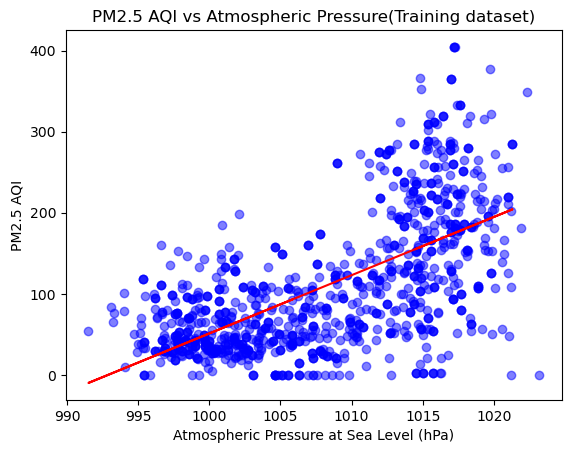

In [27]:
plt.scatter(x, y, color="blue",alpha=0.5)   
plt.plot(x_train, y_train_pred, color="red") 
plt.title('PM2.5 AQI vs Atmospheric Pressure(Training dataset)')
plt.xlabel('Atmospheric Pressure at Sea Level (hPa)')
plt.ylabel('PM2.5 AQI')
plt.show()

<h2>Ploting Residual Plot to Check If Linear Assumption Is Correct or Incorrect.

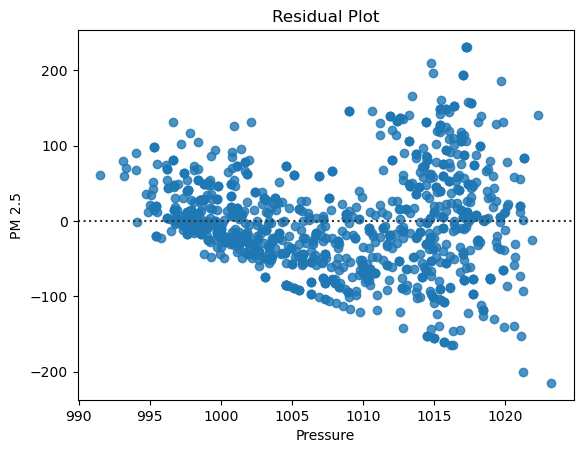

In [30]:
sns.residplot(AQI_data['Pressure'],AQI_data['PM 2.5'])
plt.title('Residual Plot')
plt.show()

<h3>We can see that residual has curvature.This suggests the linear assumption is incorrect. This plot suggests a nonlinear function.

<h2>Mean Squared Error Value for Simple Linear Regression Model

In [31]:
#Finding mean squared error value for linear regression model
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_pred)

4674.11493927356

<h2>R-Squared Value for Simple Linear Regression Model

In [32]:
#Finding R-Squared value for Linear regression model.
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.34753360661610044

In [73]:
print('Mean Squared error: ',mean_squared_error(y_test, y_test_pred).round(decimals=2))
print('R-squared value: ',r2_score(y_test, y_test_pred).round(decimals=2))

Mean Squared error:  4674.11
R-squared value:  0.35


<h1>Polynomial Regression Model

<h2>To Find Best Degree for Polynomial Regression Model

In [59]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score

degrees = range(11)

# Perform cross-validation to find the best degree
best_degree = 0
best_score = 0

for degree in degrees:
    # Polynomial feature transformation
    poly = PolynomialFeatures(degree=degree)
    x_train_poly = poly.fit_transform(x_train)
    
    # Model training
    model = LinearRegression()
    
    # Perform cross-validation
    scores = cross_val_score(model, x_train_poly, y_train, cv=5)  # Adjust the number of folds (cv) as needed
    
    # Calculate the average score
    average_score = np.mean(scores)
    
    # Check if this degree gives a better score
    if average_score > best_score:
        best_score = average_score
        best_degree = degree
print("Best degree - ",best_degree)
print("Best Score - ",best_score)

Best degree -  10
Best Score -  0.4334323610348335


<h2>Fitting Polynomial Regression Model to The Training Dataset

In [60]:
from sklearn.preprocessing import PolynomialFeatures  
poly_regs= PolynomialFeatures(degree=best_degree)  
x_poly= poly_regs.fit_transform(x_train)  
Poly_AQI =LinearRegression()  
Poly_AQI.fit(x_poly, y_train)

LinearRegression()

<h2>Polynomial Regression Model Fit with Matplotlib

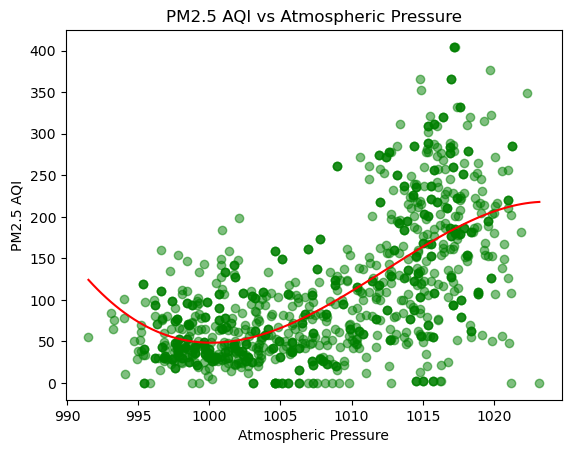

In [63]:
plt.scatter(x,y,color="green",alpha=0.5)
x_plot = np.linspace(x.min(), x.max(), 100)
plt.plot(x_plot, Poly_AQI.predict(poly_regs.fit_transform(x_plot)), color="red")
plt.title('PM2.5 AQI vs Atmospheric Pressure')
plt.xlabel('Atmospheric Pressure')
plt.ylabel('PM2.5 AQI')
plt.show() 

<h2>Mean Squared Error Value for Polynomial Regression Model

In [38]:
mean_squared_error(y_test,Poly_AQI.predict(poly_regs.fit_transform(x_test)))

4283.530117324782

<h2> R-sqaured Value for Polynomial Regression Model

In [39]:
r2_score(y_test, Poly_AQI.predict(poly_regs.fit_transform(x_test)))

0.4020559008682437

<h1>Multiple Linear Regression Analysis

<h2>Multiple Linear Regression Analysis Using 'Pressure', 'Min Temp', 'Avg Vis' and 'PM2.5'.</h2><br>
    <pr><b>Independent Variables</b> - Pressure, Min Temp and Avg Vis<br>
    <b>Dependent Variable</b> - PM 2.5

In [41]:
X=AQI_data[['Min Temp','Pressure','Avg Vis']]
Y=AQI_data['PM 2.5']

<h2>Splitting The Dataset into Training and Test Set

In [42]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

<h2>Fitting Multiple Linear Regression Model to The Training Dataset.

In [43]:
Linear_Multi = LinearRegression()
Linear_Multi.fit(X_train,Y_train)

LinearRegression()

In [44]:
Linear_Multi.intercept_

-374.7656429326554

In [45]:
Linear_Multi.coef_

array([ -5.218468  ,   0.64643839, -33.45138397])

<h2>Estimated Linear Model

Linear model will be given by:<br>
<b>PM2.5 AQI = -374.765 + (-5.218) * Min Temp + (0.646) * Pressure + (-33.451) * Avg Vis

<h2>R-squared Value for Simple Linear Regression Model

In [46]:
Linear_Multi.score(X_test,Y_test)

0.4543349079600093

<h2>Mean Squared Error Value for Multiple Linear Regression Model

In [47]:
mean_squared_error(Y_test,Linear_Multi.predict(X_test))

3909.01567407401

<h1>Polynomial Regression Analysis with Multiple Independent Variable.

<h2>To Find Best Degree for Polynomial Regression Model

In [48]:
#To find best degree for polynomial regression model.
Degrees = range(1,11)

# Perform cross-validation to find the best degree
Best_Degree = 0
Best_Score = 0

for Degree in Degrees:
    # Polynomial feature transformation
    Poly = PolynomialFeatures(degree=Degree)
    X_train_poly = Poly.fit_transform(X_train)
    
    # Model training
    Model = LinearRegression()
    
    # Perform cross-validation
    scores = cross_val_score(Model, X_train_poly, Y_train, cv=5)  # Adjust the number of folds (cv) as needed
    
    # Calculate the average scorescored 
    Average_score = np.mean(scores)
    
    # Check if this degree gives a better score
    if Average_score > Best_Score:
        Best_Score = Average_score
        Best_Degree = Degree
print("Best Degree - ",Best_Degree)
print("Best Score - ",Best_Score)

Best Degree -  3
Best Score -  0.5610402311018092


<h2>Fitting Polynomial Regression Model with Multiple Independent Variable to The Training Dataset

In [49]:
poly_regs= PolynomialFeatures(degree=Best_Degree)  
X_poly= poly_regs.fit_transform(X_train)  
Poly_Multi =LinearRegression()  
Poly_Multi.fit(X_poly, Y_train)

LinearRegression()

<h2>Mean Squared Error Value for Polynomial Regression Model

In [50]:
mean_squared_error(Poly_Multi.predict(poly_regs.fit_transform(X_test)),Y_test)

3146.8118113719934

<h2>R-squared Value for Polynomial Regression Model

In [51]:
Poly_Multi.score(poly_regs.fit_transform(X_test),Y_test)

0.5607320359257484

<h1>Conclusion

<pr>In conclusion, the regression analysis project explored the effectiveness of various regression models for predicting the dependent variable. The mean squared error (MSE) values were calculated to assess the accuracy of the models. The simple linear regression model achieved an MSE of 4674.11, while the multiple linear regression model performed slightly better with an MSE of 3909.015. Similarly, the simple polynomial regression model had an MSE of 4283.53, while the multiple polynomial regression model exhibited the lowest MSE of 3146.81, indicating its superior predictive ability. Additionally, the R-squared values were examined to determine the proportion of variance explained by the models. The simple linear regression and multiple linear regression models had R-squared values of 0.35 and 0.45 respectively. On the other hand, the simple polynomial regression and multiple polynomial regression models demonstrated higher R-squared values of 0.402 and 0.560, suggesting better fit and greater explanatory power. These findings highlight the significance of employing polynomial regression models for improved predictive accuracy.</pr>